In [1]:
from factor_analysis import *

In [2]:
start_date = '2016-01-01'
end_date = '2023-01-01'

In [3]:
index_fix = index_fix(start_date,end_date,'000906.XSHG')

In [4]:
# 获取日期 和 标的
stock_list = index_fix.columns.tolist()
date_list = index_fix.index.tolist()

new_stock_filter = get_new_stock_filter(stock_list,date_list)
st_filter = get_st_filter(stock_list,date_list)
suspended_filter = get_suspended_filter(stock_list,date_list)
limit_up_down_filter = get_limit_up_down_filter(stock_list,date_list).fillna(True)

def data_clean(factor,new_stock_filter = new_stock_filter,st_filter = st_filter,suspended_filter = suspended_filter,limit_up_down_filter = limit_up_down_filter,index_fix= index_fix):
    # 剔除ST、涨停、停牌、新股、动态券池
    factor = factor.mask(new_stock_filter).mask(st_filter).mask(suspended_filter).mask(limit_up_down_filter).mask(~index_fix).dropna(how = 'all')
    print('券池过滤完毕')
    # 离群值处理
    factor = factor.apply(lambda x :filter_extreme_MAD(x,3), axis=1)
    # 标准化
    factor = factor.sub(factor.mean(axis=1), axis=0).div(factor.std(axis=1), axis=0) #add
    print('因子数据清洗完成，已剔除离群值、中性化处理')
    # 行业市值中性化
    factor = neutralization(factor)
    print('因子完成行业市值中性化')
    
    return factor

new_stock_filter load
st_filter load
suspended_filter load
limit_up_down_filter load


### 非线性改造

#### 非线性改造通式

#### 风险性改造案例（一）CFOA

In [5]:
cfoa_mrq = Factor("cash_flow_from_operating_activities_mrq_0") / Factor("total_assets_mrq_0")
cfoa_mrq = execute_factor(cfoa_mrq,stock_list,start_date,end_date)

cfoa_mrq_neu = data_clean(cfoa_mrq)

券池过滤完毕
因子数据清洗完成，已剔除离群值、中性化处理


100%|██████████| 1703/1703 [00:31<00:00, 53.97it/s]

因子完成行业市值中性化


In [26]:
x,IC = Quick_Factor_Return_N_IC(cfoa_mrq_neu,20,'cfoa_mrq_neu')

{'name': 'cfoa_mrq_neu', 'IC mean': 0.0234, 'IC std': 0.0496, 'IR': 0.4727, 'IR_ly': 0.3026, 'IC>0': 0.694, 'ABS_IC>2%': 0.732, 't_stat': 19.3915}


<AxesSubplot: xlabel='datetime'>

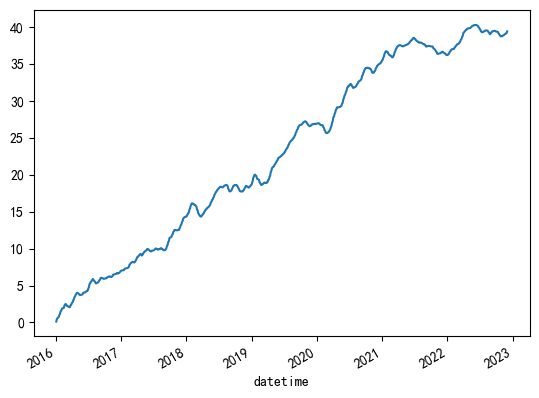

In [27]:
x.cumsum().plot()

100%|██████████| 86/86 [00:05<00:00, 14.46it/s]


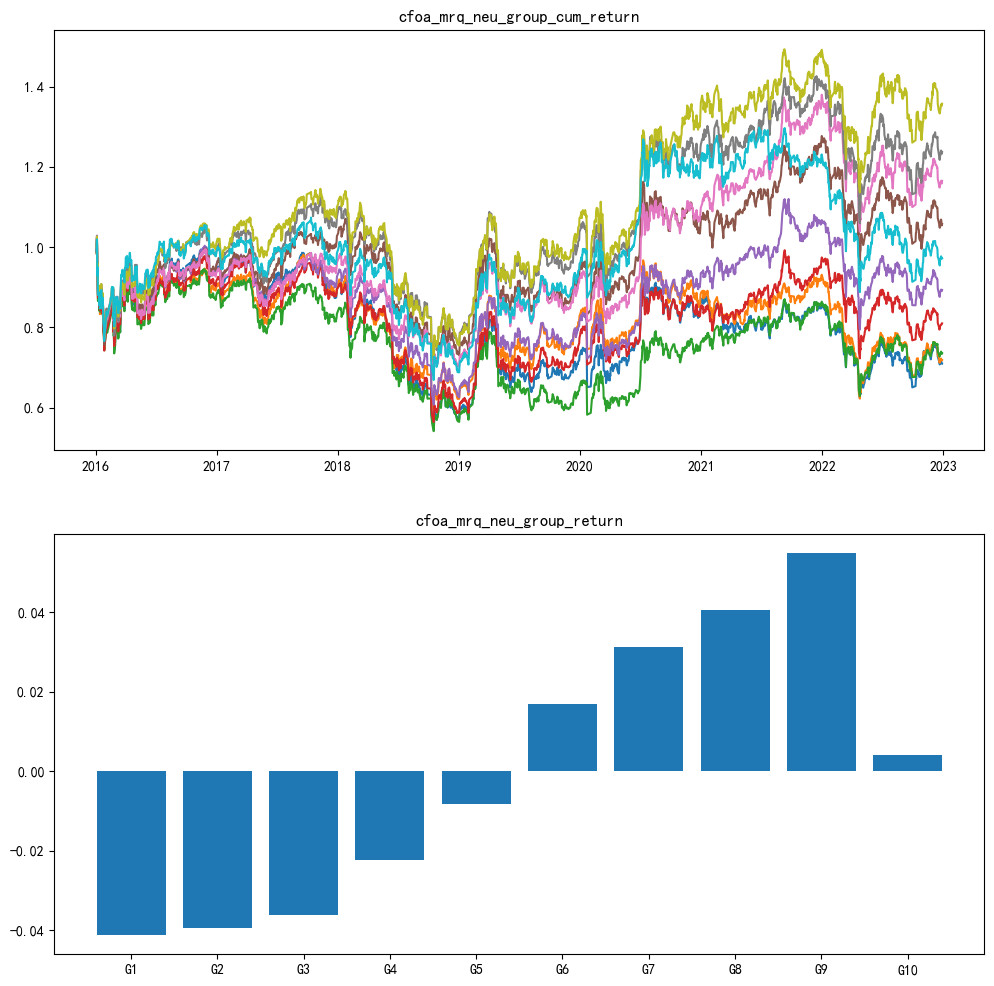

In [19]:
group_return,group_return_year,turnover_ratio = group_g(cfoa_mrq_neu,'cfoa_mrq_neu')

<AxesSubplot: >

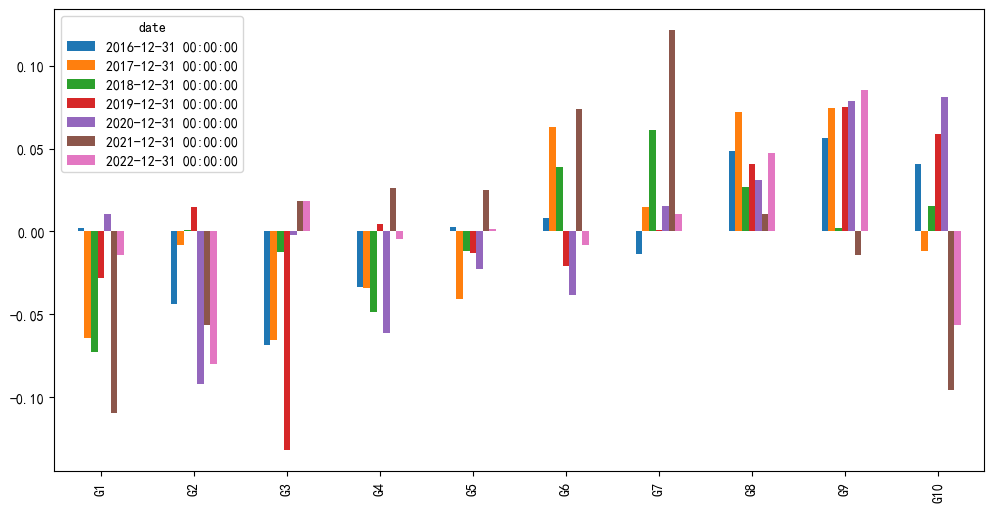

In [20]:
group_return_year.plot(kind = 'bar',figsize = (12,6))

##### 改造方法一  (对于原始的数据进行改造)

In [31]:
cfoa_mrq_75 = nonlinear_transform(cfoa_mrq,0.75)

In [32]:
cfoa_mrq_75_neu = data_clean(cfoa_mrq_75)

券池过滤完毕
因子数据清洗完成，已剔除离群值、中性化处理


100%|██████████| 1703/1703 [00:41<00:00, 40.99it/s]

因子完成行业市值中性化


In [33]:
x,IC = Quick_Factor_Return_N_IC(cfoa_mrq_75_neu,20,'cfoa_mrq_75_neu')

{'name': 'cfoa_mrq_75_neu', 'IC mean': 0.0176, 'IC std': 0.0369, 'IR': 0.4767, 'IR_ly': 0.6432, 'IC>0': 0.6999, 'ABS_IC>2%': 0.6055, 't_stat': 19.5566}


<AxesSubplot: xlabel='datetime'>

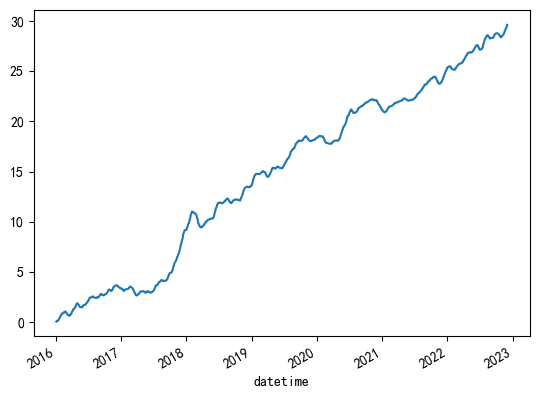

In [34]:
x.cumsum().plot()

100%|██████████| 86/86 [00:06<00:00, 13.18it/s]


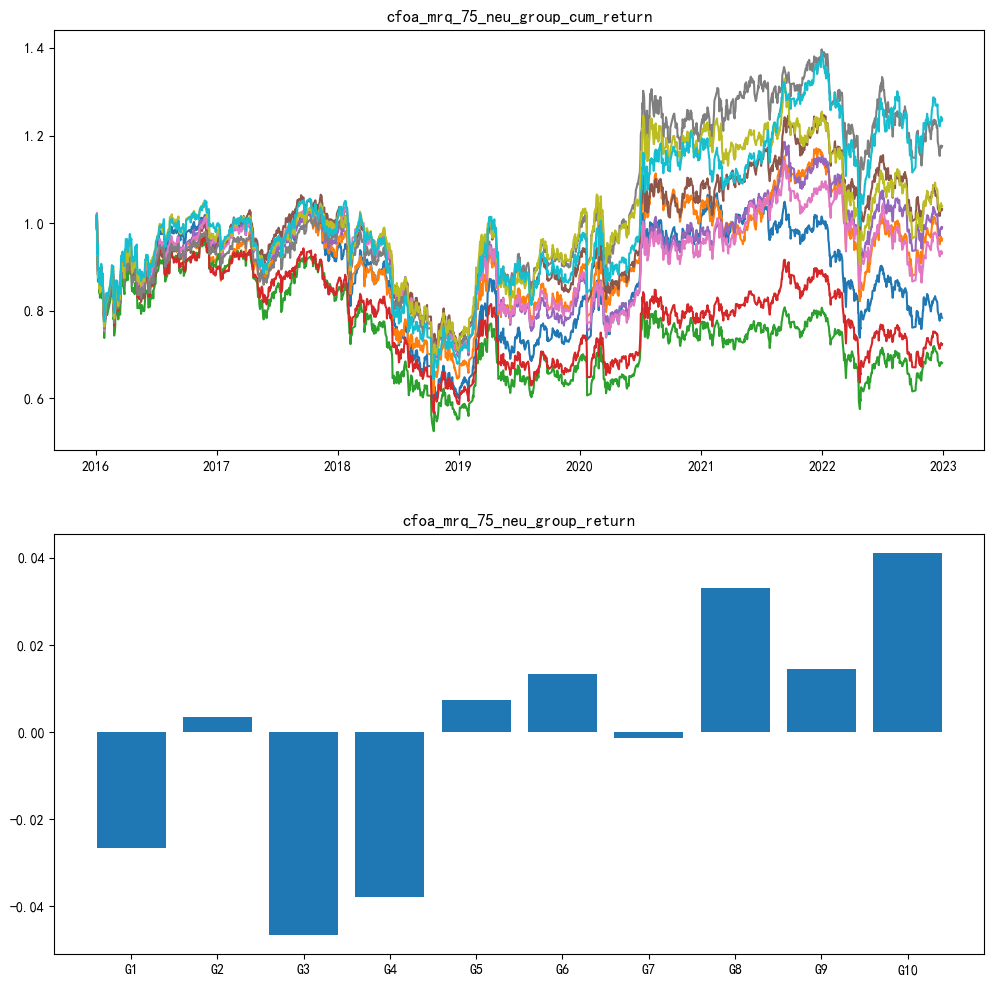

In [35]:
group_return,group_return_year,turnover_ratio = group_g(cfoa_mrq_75_neu,'cfoa_mrq_75_neu')

<AxesSubplot: >

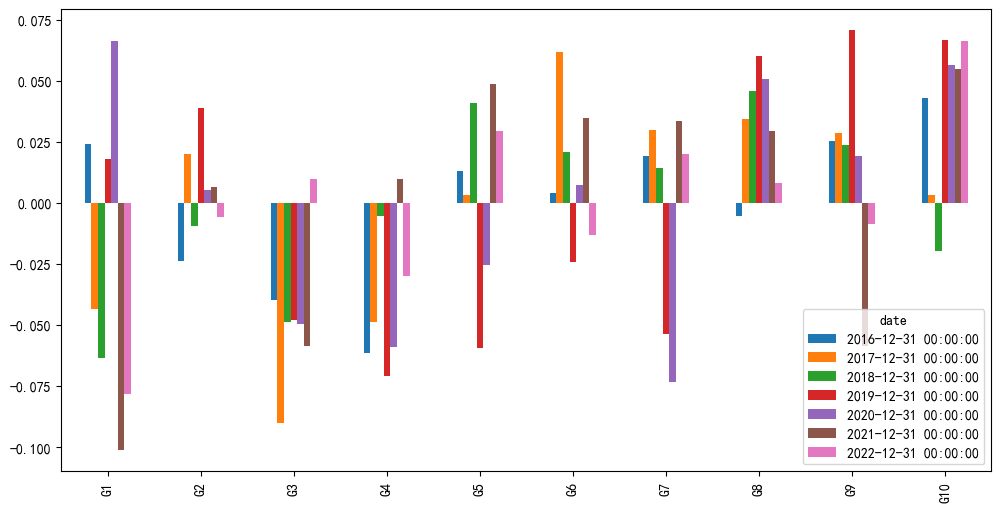

In [36]:
group_return_year.plot(kind = 'bar',figsize = (12,6))

##### 改造方法二  (对于中性化后的数据进行改造)

In [22]:
cfoa_mrq_neu_75 = nonlinear_transform(cfoa_mrq_neu,0.75)

In [23]:
x,IC = Quick_Factor_Return_N_IC(cfoa_mrq_neu_75,20,'cfoa_mrq_neu_75')

{'name': 'cfoa_mrq_neu_75', 'IC mean': 0.0246, 'IC std': 0.0496, 'IR': 0.4962, 'IR_ly': 0.5433, 'IC>0': 0.7184, 'ABS_IC>2%': 0.7439, 't_stat': 20.3543}


<AxesSubplot: xlabel='datetime'>

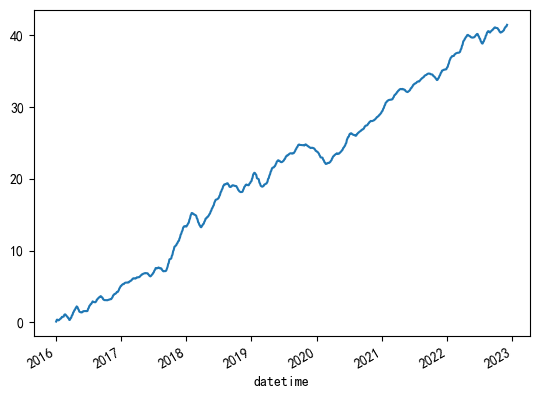

In [24]:
x.cumsum().plot()

100%|██████████| 86/86 [00:10<00:00,  8.06it/s]


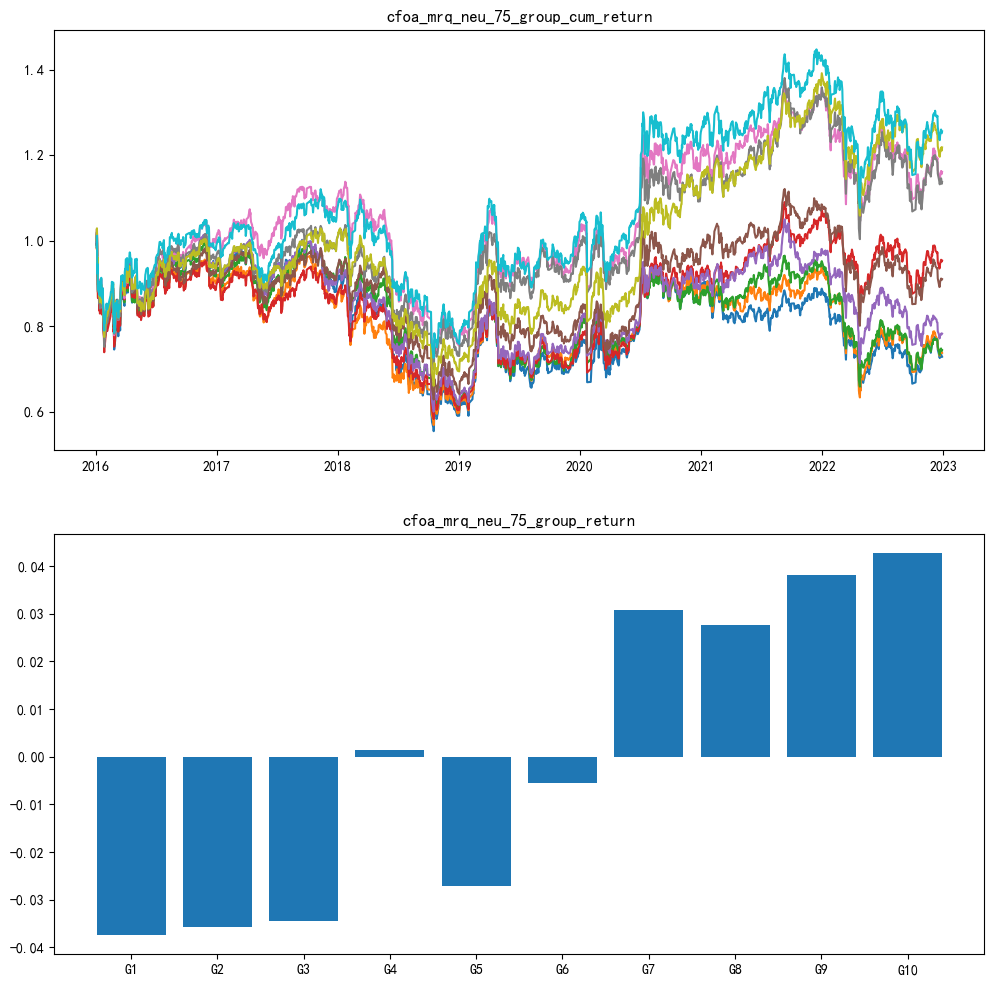

In [28]:
group_return,group_return_year,turnover_ratio = group_g(cfoa_mrq_neu_75,'cfoa_mrq_neu_75')

<AxesSubplot: >

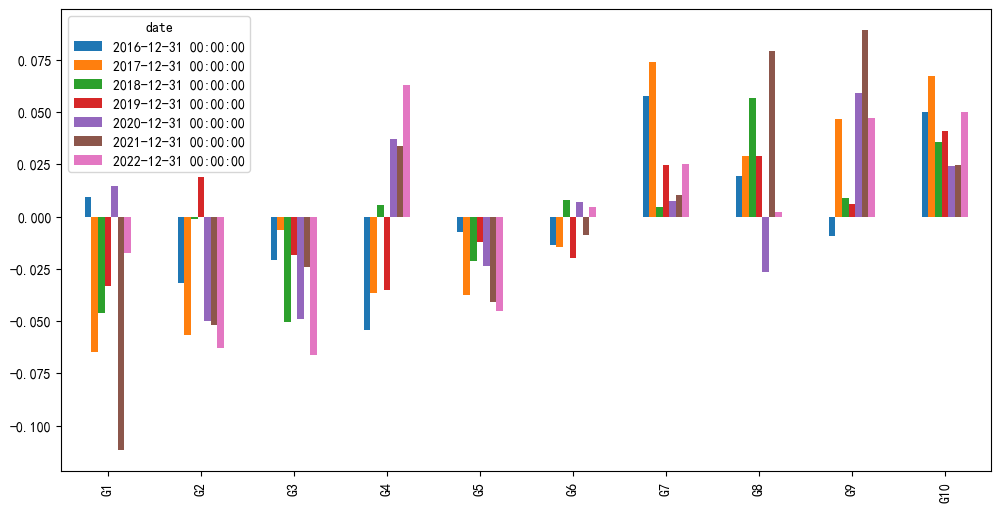

In [29]:
group_return_year.plot(kind = 'bar',figsize = (12,6))

##### 对非线性改造后的数据再次进行中性化的必要性

In [37]:
cfoa_mrq_neu_75_neu = data_clean(cfoa_mrq_neu_75)

券池过滤完毕
因子数据清洗完成，已剔除离群值、中性化处理


100%|██████████| 1703/1703 [00:37<00:00, 45.28it/s]

因子完成行业市值中性化


{'name': 'cfoa_mrq_neu_75_neu', 'IC mean': 0.0201, 'IC std': 0.036, 'IR': 0.5594, 'IR_ly': 0.4709, 'IC>0': 0.7314, 'ABS_IC>2%': 0.6245, 't_stat': 22.9495}


<AxesSubplot: xlabel='datetime'>

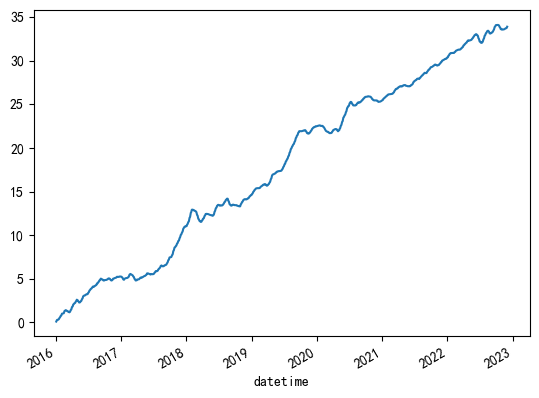

In [39]:
x,IC = Quick_Factor_Return_N_IC(cfoa_mrq_neu_75_neu,20,'cfoa_mrq_neu_75_neu')
x.cumsum().plot()

100%|██████████| 86/86 [00:05<00:00, 15.96it/s]


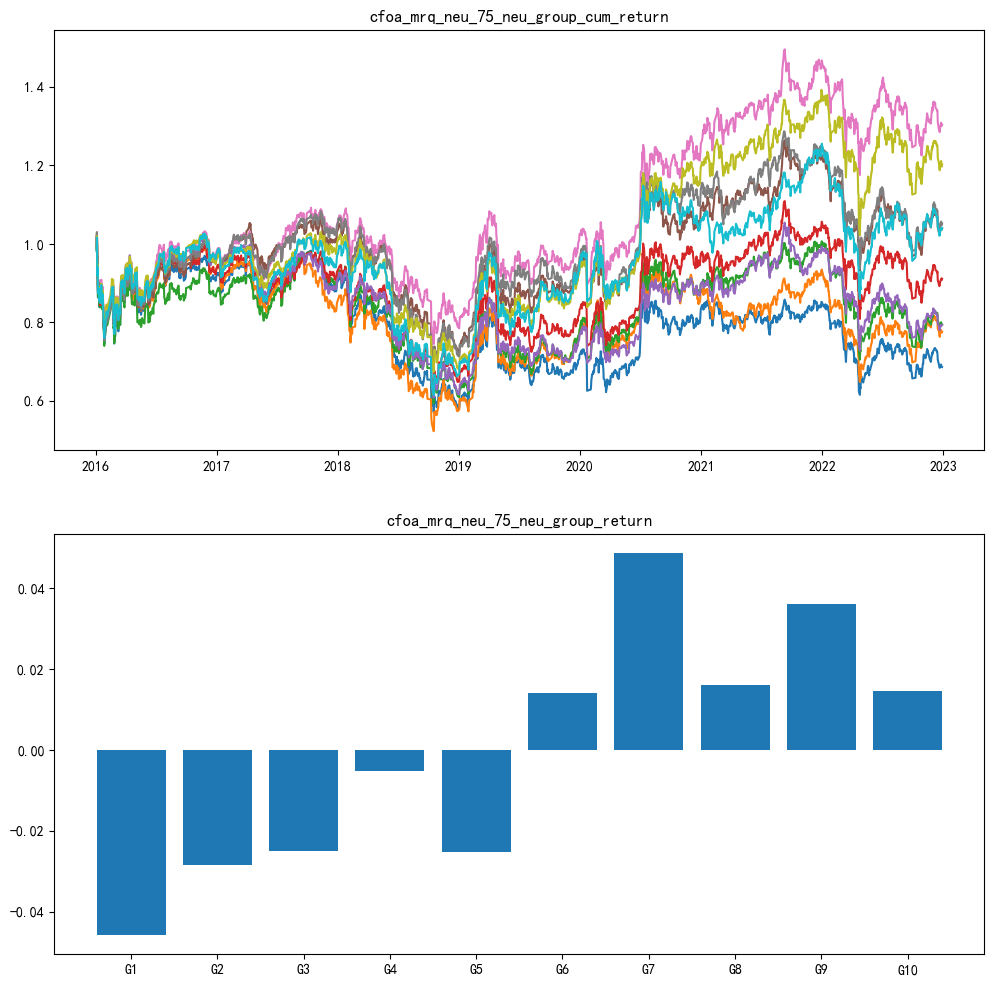

In [40]:
group_return,group_return_year,turnover_ratio = group_g(cfoa_mrq_neu_75_neu,'cfoa_mrq_neu_75_neu')

<AxesSubplot: >

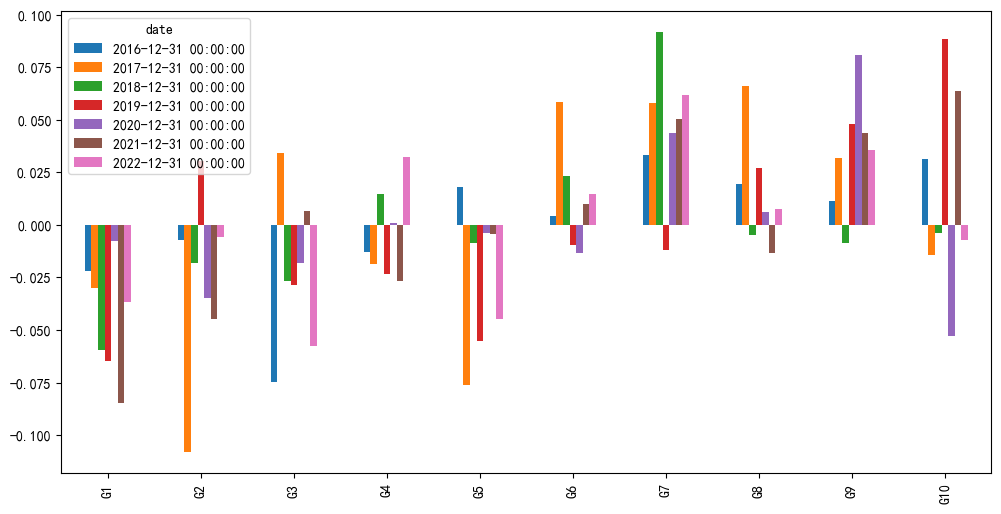

In [41]:
group_return_year.plot(kind = 'bar',figsize = (12,6))

#### 风险性改造案例（一）APR_MRQ

In [43]:
apr_mrq = (Factor("profit_from_operation_mrq_0") - Factor("cash_flow_from_operating_activities_mrq_0")) /(Factor("profit_from_operation_mrq_0"))

apr_mrq = execute_factor(apr_mrq,stock_list,start_date,end_date)

apr_mrq_neu = data_clean(apr_mrq)

C:\Users\Nick_Ni\AppData\Local\Temp\ipykernel_34108\658912245.py:3: RuntimeWarning: divide by zero encountered in divide
  apr_mrq = execute_factor(apr_mrq,stock_list,start_date,end_date)


券池过滤完毕
因子数据清洗完成，已剔除离群值、中性化处理


100%|██████████| 1703/1703 [00:40<00:00, 41.80it/s]

因子完成行业市值中性化


In [44]:
x,IC = Quick_Factor_Return_N_IC(apr_mrq_neu,20,'apr_mrq_neu')

{'name': 'apr_mrq_neu', 'IC mean': -0.0123, 'IC std': 0.0338, 'IR': -0.3648, 'IR_ly': -0.9954, 'IC>0': 0.3214, 'ABS_IC>2%': 0.6144, 't_stat': -14.9653}


<AxesSubplot: xlabel='datetime'>

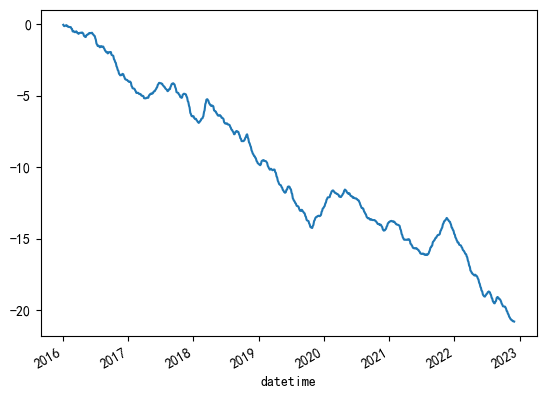

In [45]:
x.cumsum().plot()

100%|██████████| 86/86 [00:07<00:00, 11.80it/s]


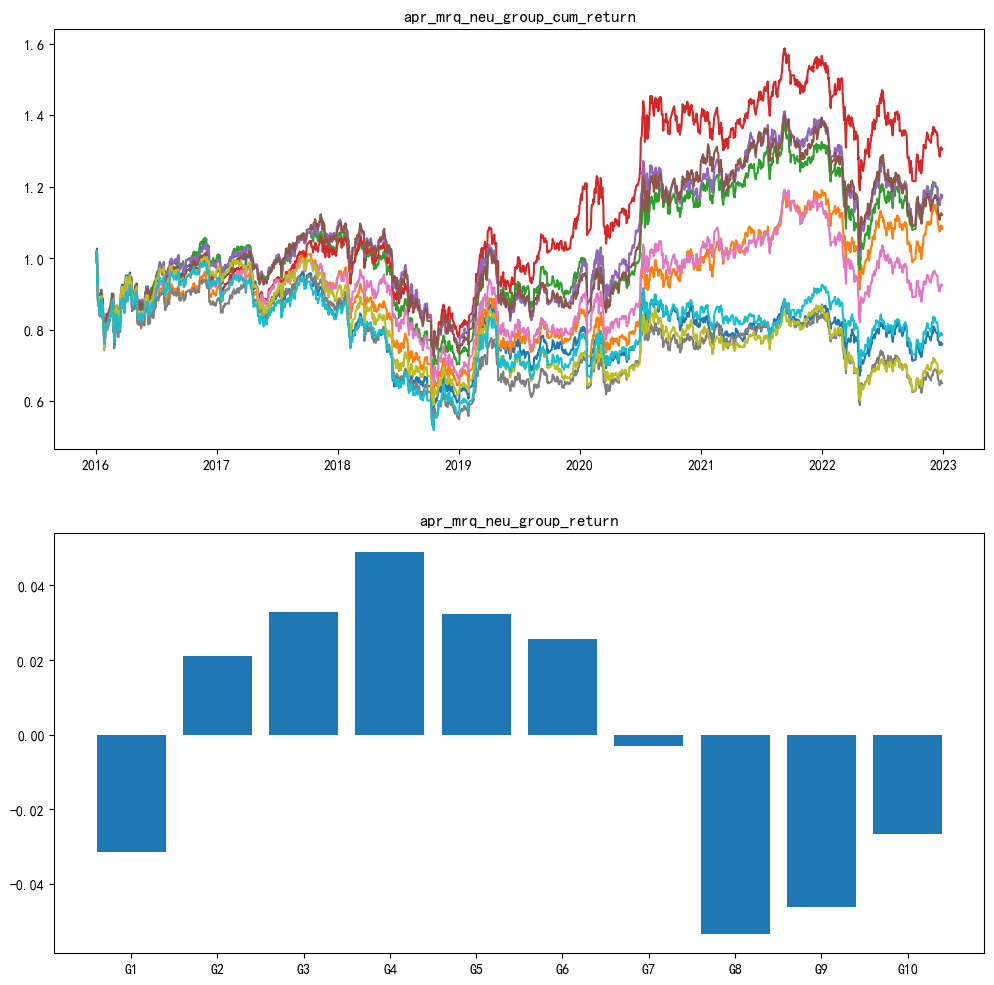

In [46]:
group_return,group_return_year,turnover_ratio = group_g(apr_mrq_neu,'apr_mrq_neu')

<AxesSubplot: >

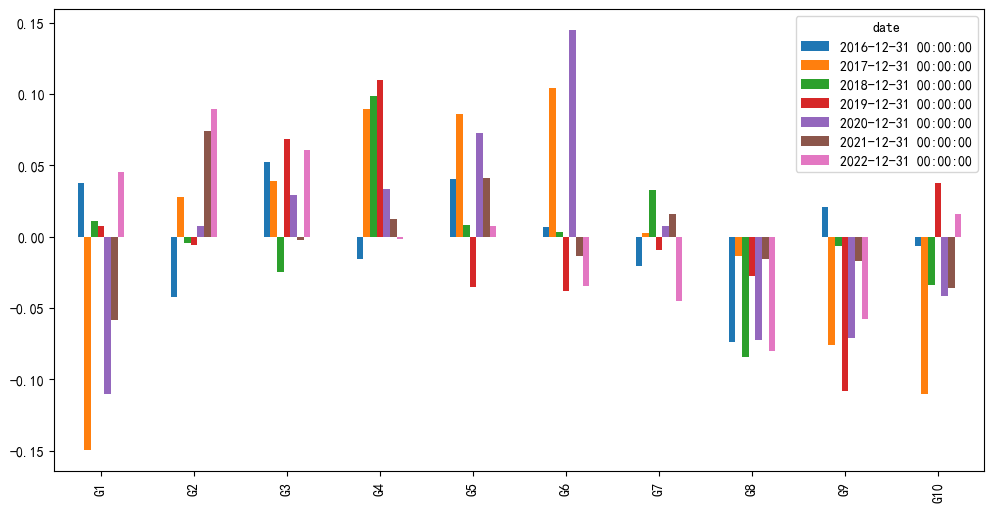

In [47]:
group_return_year.plot(kind = 'bar',figsize = (12,6))

In [56]:
apr_mrq_neu_35 = nonlinear_transform(apr_mrq_neu,0.35)

In [57]:
x,IC = Quick_Factor_Return_N_IC(apr_mrq_neu_35,20,'apr_mrq_neu_35')

{'name': 'apr_mrq_neu_35', 'IC mean': 0.0238, 'IC std': 0.0865, 'IR': 0.2748, 'IR_ly': -0.1385, 'IC>0': 0.593, 'ABS_IC>2%': 0.8479, 't_stat': 11.2755}


<AxesSubplot: xlabel='datetime'>

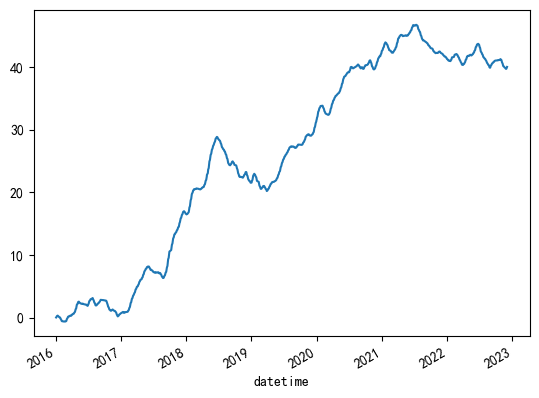

In [58]:
x.cumsum().plot()

100%|██████████| 86/86 [00:08<00:00,  9.73it/s]


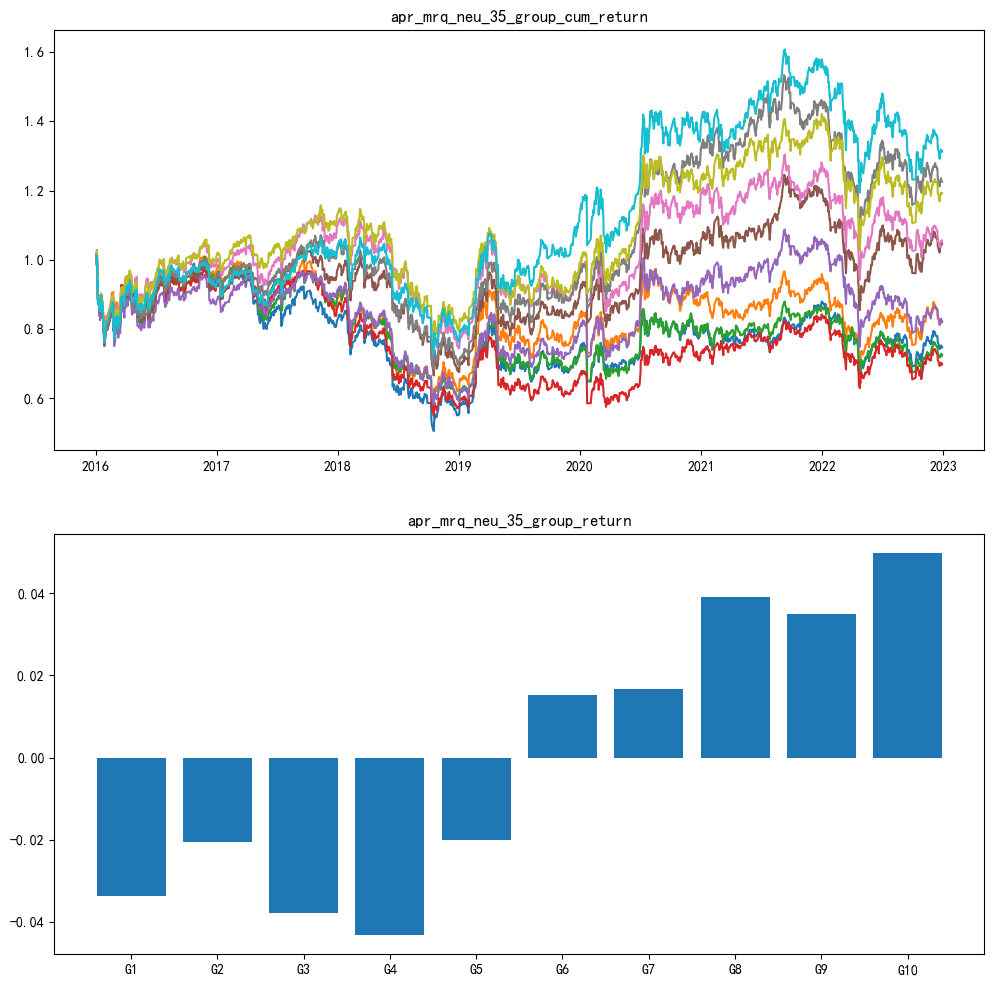

In [59]:
group_return,group_return_year,turnover_ratio = group_g(apr_mrq_neu_35,'apr_mrq_neu_35')

<AxesSubplot: >

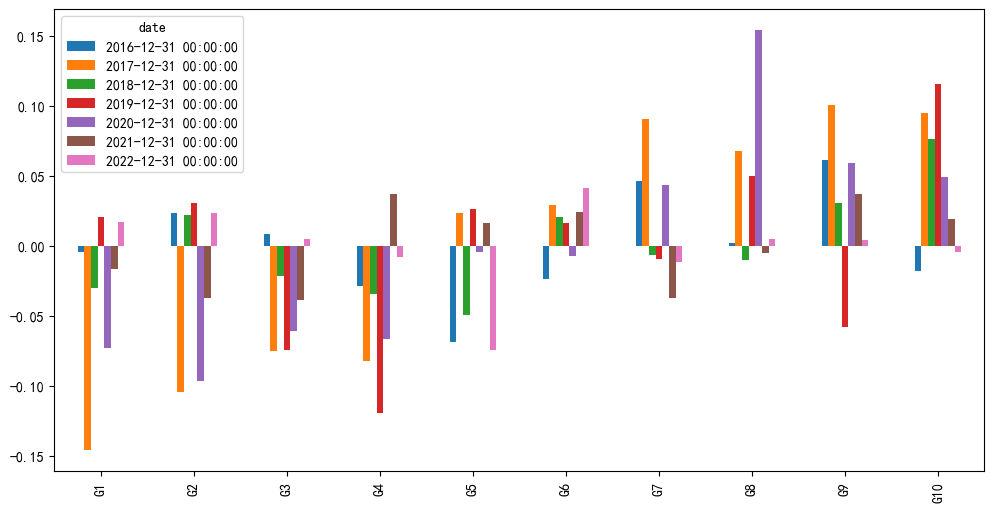

In [60]:
group_return_year.plot(kind = 'bar',figsize = (12,6))

### 基于因子多项式的ALPHA因子预测模型

$ ri = aF^3 + bF^2 + cF + d$ 

In [212]:
debt_to_asset_ratio_mrq = Factor('total_liabilities_mrq_0') / Factor('total_assets_mrq_0')

In [213]:
debt_to_asset_ratio_mrq = execute_factor(debt_to_asset_ratio_mrq,stock_list,start_date,'2021-02-01')

debt_to_asset_ratio_mrq_neu = data_clean(debt_to_asset_ratio_mrq)

券池过滤完毕
因子数据清洗完成，已剔除离群值、中性化处理
中信行业数据已获取
动态行业数据已构建


100%|██████████| 1239/1239 [00:24<00:00, 49.99it/s]


因子完成行业市值中性化


In [214]:
x,IC = Quick_Factor_Return_N_IC(debt_to_asset_ratio_mrq_neu,20,'debt_to_asset_ratio_mrq_neu')

{'name': 'debt_to_asset_ratio_mrq_neu', 'IC mean': -0.0054, 'IC std': 0.0564, 'IR': -0.0955, 'IR_ly': 0.107, 'IC>0': 0.443, 'ABS_IC>2%': 0.7441, 't_stat': -3.3339}


<AxesSubplot: xlabel='datetime'>

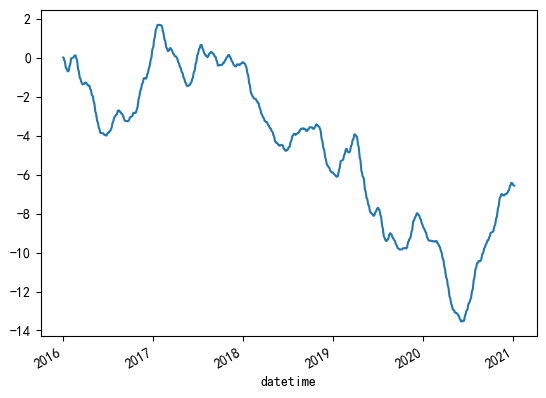

In [215]:
x.cumsum().plot()

100%|██████████| 62/62 [00:04<00:00, 15.17it/s]


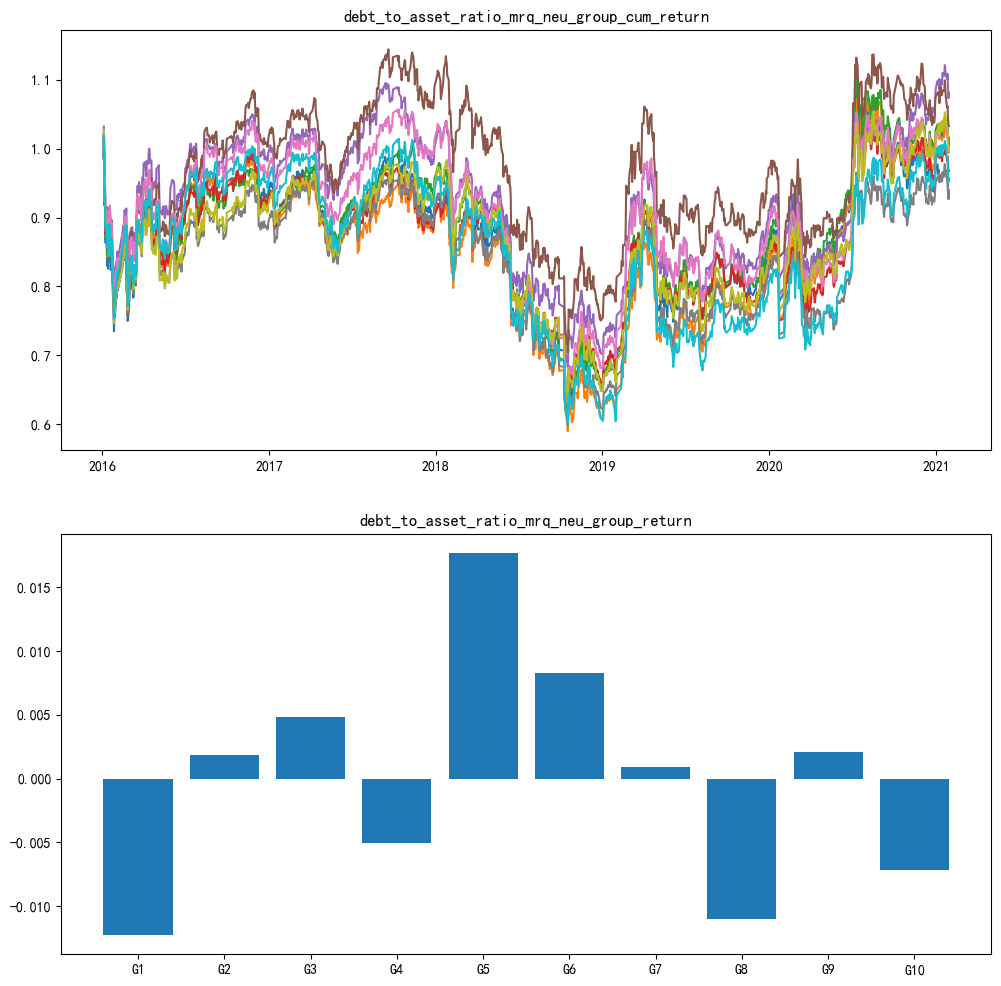

In [216]:
group_return,group_return_year,turnover_ratio = group_g(debt_to_asset_ratio_mrq_neu,'debt_to_asset_ratio_mrq_neu',g = 10)

100%|██████████| 62/62 [00:02<00:00, 29.41it/s]


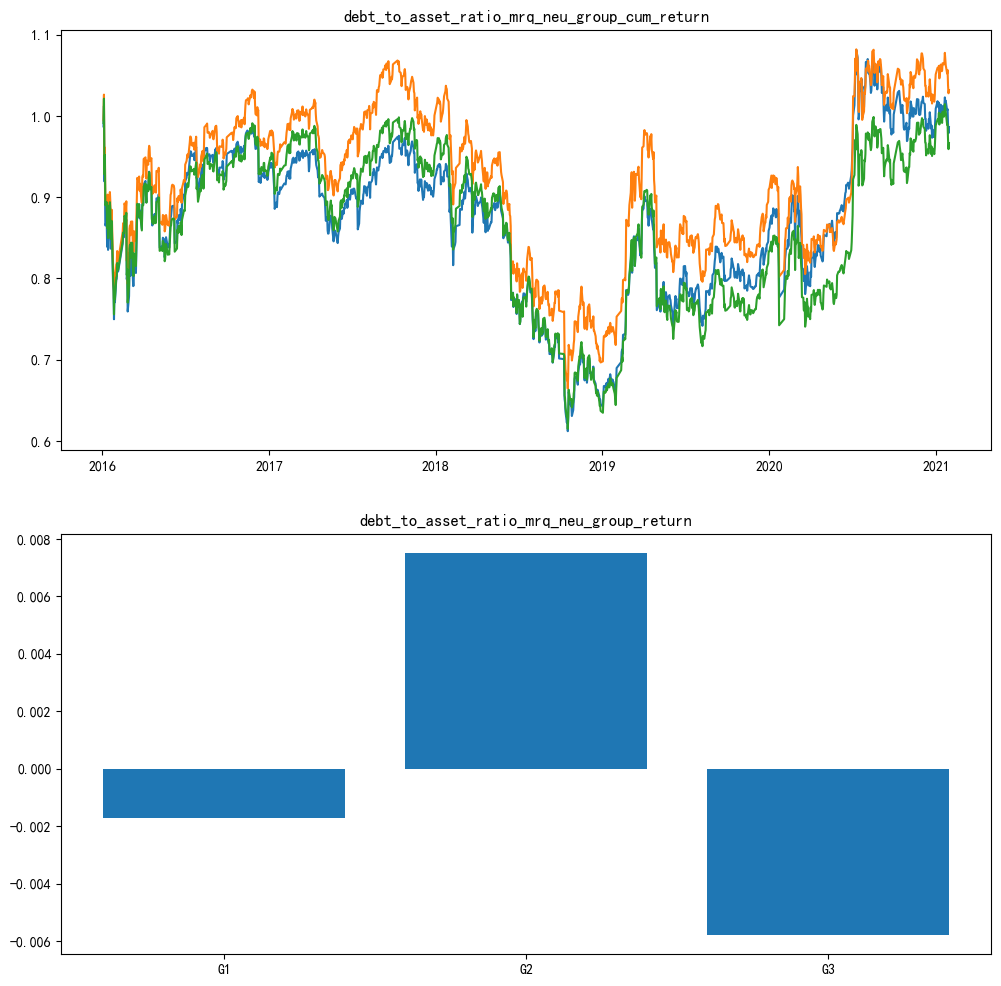

In [217]:
group_return,group_return_year,turnover_ratio = group_g(debt_to_asset_ratio_mrq_neu,'debt_to_asset_ratio_mrq_neu',g = 3)

In [218]:
close = pd.read_pickle('close_2016-01-04_2022-12-30.pkl')

ret = close.pct_change().iloc[1:]

In [219]:
param = pd.DataFrame()
for i in tqdm(debt_to_asset_ratio_mrq_neu.index[1:]):
    data_temp = pd.concat([ret.loc[i].to_frame('ret'),(debt_to_asset_ratio_mrq_neu.loc[i]**3).to_frame('a'),(debt_to_asset_ratio_mrq_neu.loc[i]**3).to_frame('b'),(debt_to_asset_ratio_mrq_neu.loc[i]**3).to_frame('c')],axis = 1).dropna()
    data_temp['d'] = 1
    temp_y = data_temp.ret
    temp_x = data_temp.iloc[:,1:]
    param_temp = sm.OLS(temp_y.astype(float),temp_x.astype(float),hasconst=False, missing='drop').fit().params.to_frame(i)
    param = pd.concat([param,param_temp],axis = 1)

param = param.T

100%|██████████| 1238/1238 [00:15<00:00, 81.33it/s]


In [220]:
param_r240 = .rolling(240).mean().dropna()

<AxesSubplot: >

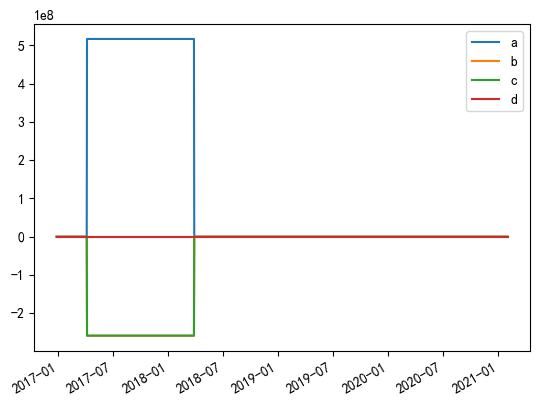

In [221]:
param_r240.iloc[-1000:].plot()

In [222]:
debt_to_asset_ratio_mrq_neu_poly = ((debt_to_asset_ratio_mrq_neu ** 3).mul(param_r240.a,axis = 0) + (debt_to_asset_ratio_mrq_neu ** 2).mul(param_r240.b,axis = 0) + debt_to_asset_ratio_mrq_neu.mul(param_r240.c,axis = 0)).add(param_r240.d,axis = 0).iloc[240:]

In [223]:
x,IC = Quick_Factor_Return_N_IC(debt_to_asset_ratio_mrq_neu_poly,20,'debt_to_asset_ratio_mrq_neu_poly')

{'name': 'debt_to_asset_ratio_mrq_neu_poly', 'IC mean': 0.0126, 'IC std': 0.0528, 'IR': 0.2382, 'IR_ly': 0.5381, 'IC>0': 0.6231, 'ABS_IC>2%': 0.7354, 't_stat': 7.4541}


<AxesSubplot: >

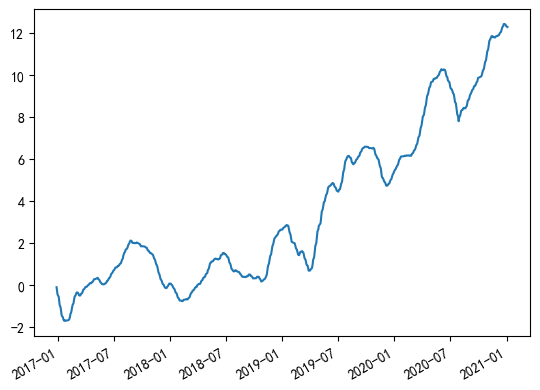

In [224]:
x.cumsum().plot()

100%|██████████| 50/50 [00:02<00:00, 16.88it/s]


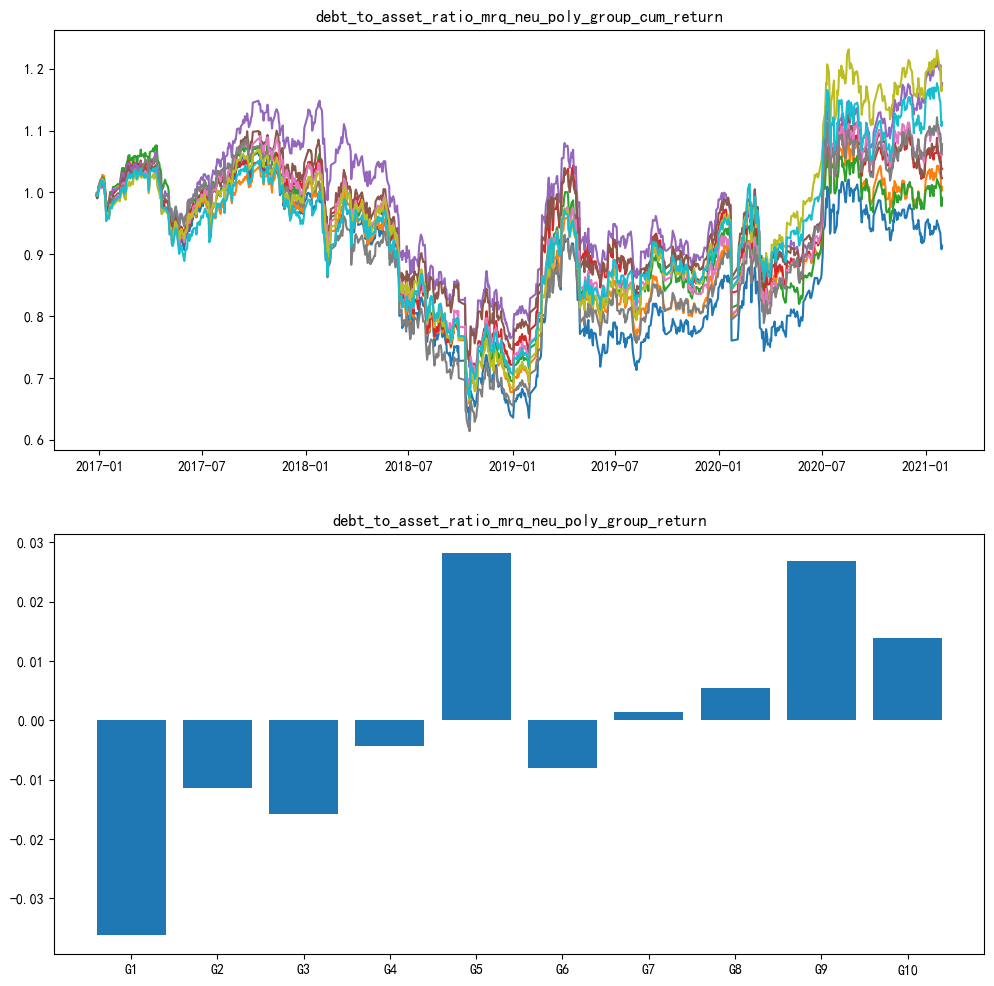

In [225]:
group_return,group_return_year,turnover_ratio = group_g(debt_to_asset_ratio_mrq_neu_poly,'debt_to_asset_ratio_mrq_neu_poly',g = 10)

### BARRA风格分域ALPHA因子预测模型 换手率

In [292]:
mc = execute_factor(Factor('market_cap_3'),stock_list,start_date,end_date)

In [293]:
# 找出大市值标的
mc_dummary = (mc.rank(axis = 1).sub((mc.count(axis = 1)/2).round(0),axis = 0 ) > 0).astype(int)

In [297]:
# 当日换手率因子
def turnover_rate(order_book_ids,start_date,end_date):
    return get_turnover_rate(order_book_ids,start_date,end_date,fields='today').today.unstack('order_book_id').reindex(columns=order_book_ids,index =pd.to_datetime(rqdatac.get_trading_dates(start_date,end_date)))

DAILY_TURNOVER_RATE = UserDefinedLeafFactor('DAILY_TURNOVER_RATE',turnover_rate)

turnover_20std = execute_factor(STD(DAILY_TURNOVER_RATE,20),stock_list,start_date,end_date)

In [300]:
turnover_20std_neu = data_clean(turnover_20std)

券池过滤完毕
因子数据清洗完成，已剔除离群值、中性化处理


100%|██████████| 1703/1703 [00:34<00:00, 49.09it/s]


因子完成行业市值中性化


{'name': 'turnover_20std_neu', 'IC mean': -0.0673, 'IC std': 0.0924, 'IR': -0.7281, 'IR_ly': -0.9414, 'IC>0': 0.2311, 'ABS_IC>2%': 0.8645, 't_stat': -29.8687}


<AxesSubplot: xlabel='datetime'>

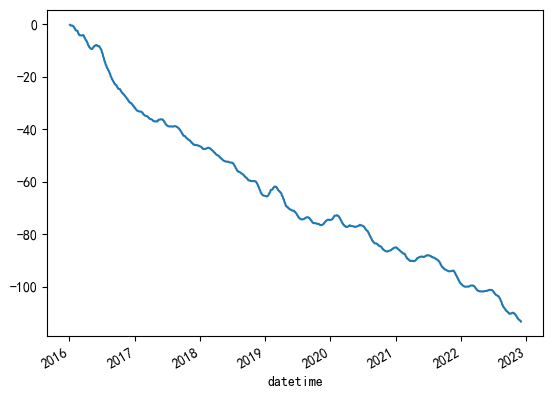

In [302]:
x,IC = Quick_Factor_Return_N_IC(turnover_20std_neu,20,'turnover_20std_neu')
x.cumsum().plot()

100%|██████████| 86/86 [00:07<00:00, 11.32it/s]


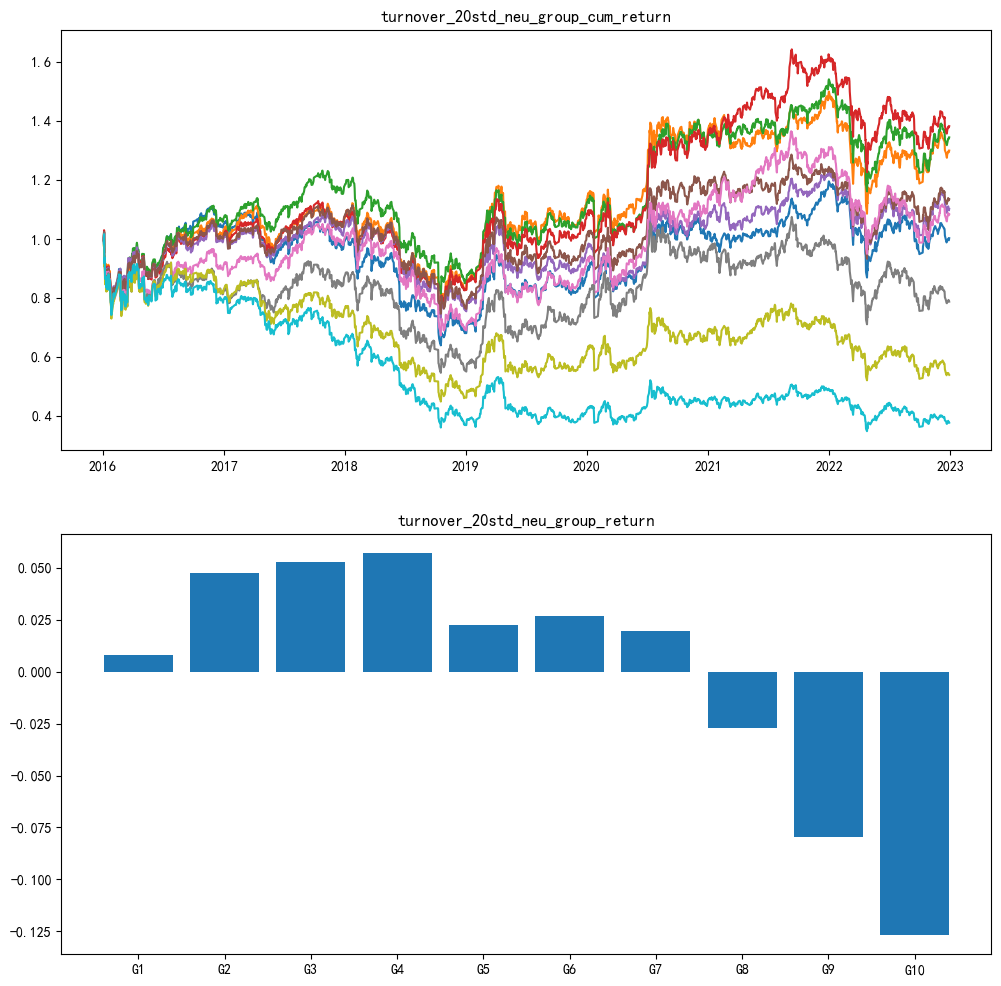

In [303]:
group_return,group_return_year,turnover_ratio = group_g(turnover_20std_neu,'turnover_20std_neu',g = 10)

In [307]:
turnover_20std_neu_mc_dummary = turnover_20std_neu - ep_neu

{'name': 'turnover_20std_neu_mc_dummary', 'IC mean': -0.0716, 'IC std': 0.1065, 'IR': -0.6717, 'IR_ly': -0.5988, 'IC>0': 0.2674, 'ABS_IC>2%': 0.8877, 't_stat': -27.5573}


<AxesSubplot: xlabel='datetime'>

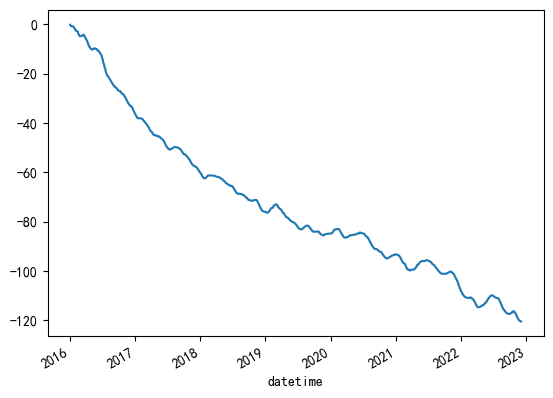

In [308]:
x,IC = Quick_Factor_Return_N_IC(turnover_20std_neu_mc_dummary,20,'turnover_20std_neu_mc_dummary')
x.cumsum().plot()

100%|██████████| 86/86 [00:06<00:00, 13.51it/s]


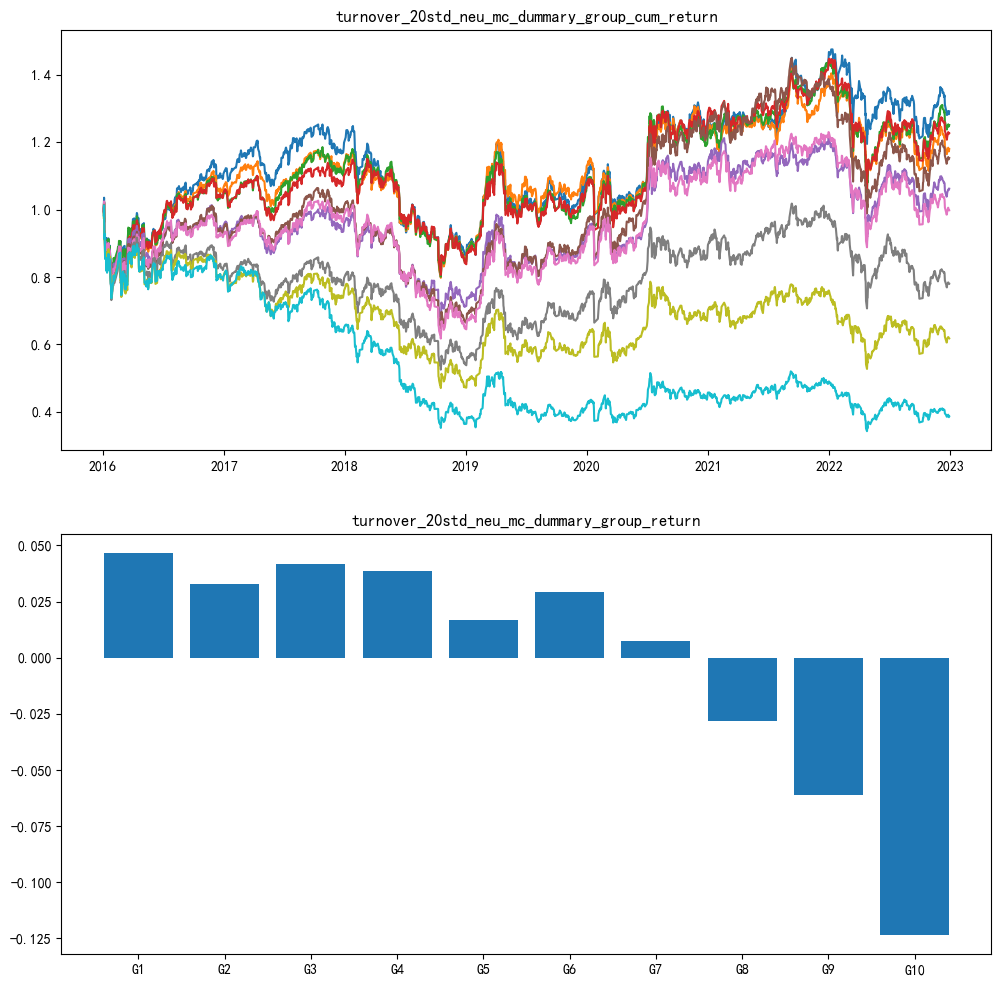

In [309]:
group_return,group_return_year,turnover_ratio = group_g(turnover_20std_neu_mc_dummary,'turnover_20std_neu_mc_dummary',g = 10)